In [ ]:
%pip install matplotlib seaborn pandas numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset


In [ ]:
# Reading the DataSet From the .csv file
dataset  = pd.read_csv('UberDataset.csv')
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
# To find the Shape of the DataSet
dataset.shape

(1156, 7)

In [39]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 1047
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  420 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    420 non-null    object        
 3   START       420 non-null    object        
 4   STOP        420 non-null    object        
 5   MILES       420 non-null    float64       
 6   PURPOSE     420 non-null    object        
 7   Month_Year  420 non-null    period[M]     
 8   Hour        420 non-null    int32         
dtypes: datetime64[ns](2), float64(1), int32(1), object(4), period[M](1)
memory usage: 31.2+ KB


,START_DATE,END_DATE,MILES,Hour
count,420,420,420.000000,420.000000
mean,2016-07-01 11:51:50.571428608,2016-07-01 12:11:10.142857216,9.083810,14.969048
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,0.000000
25%,2016-03-27 14:54:00,2016-03-27 15:10:00,2.775000,12.000000
50%,2016-07-04 17:57:00,2016-07-04 18:19:00,5.700000,15.000000
75%,2016-10-10 17:24:45,2016-10-10 17:39:15,9.900000,18.000000
max,2016-12-12 20:48:00,2016-12-12 20:57:00,174.200000,23.000000
std,NaN,NaN,16.386685,4.657890


Data PreProcessing

In [8]:
dataset['PURPOSE'] . fillna("NOT" , inplace = True)

In [9]:
# Changing the Start_date and End_date to Date_Time Format.

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

In [10]:
dataset.dropna(inplace=True)

In [32]:
dataset.drop_duplicates(inplace=True)

Exploring Unique Values 

In [38]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].nunique()
unique_values


{'CATEGORY': 2, 'START': 109, 'STOP': 113, 'PURPOSE': 7}

Data Visualization

Category Vs Personal

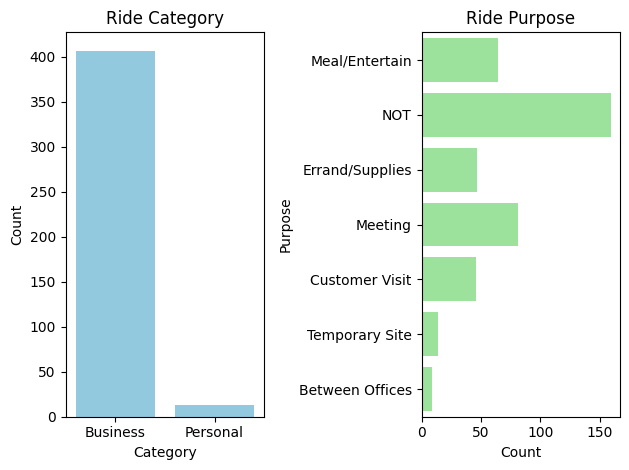

In [33]:
# CATEGORY
plt.subplot(1,2,1)
sns.countplot(x='CATEGORY', data=dataset, color='skyblue')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Ride Category")

# PURPOSE
plt.subplot(1,2,2)
sns.countplot(y='PURPOSE', data=dataset, color='lightgreen')
plt.xlabel("Count")
plt.ylabel("Purpose")
plt.title("Ride Purpose")

plt.tight_layout()
plt.show()

Purpose Vs Category(Comparsion)

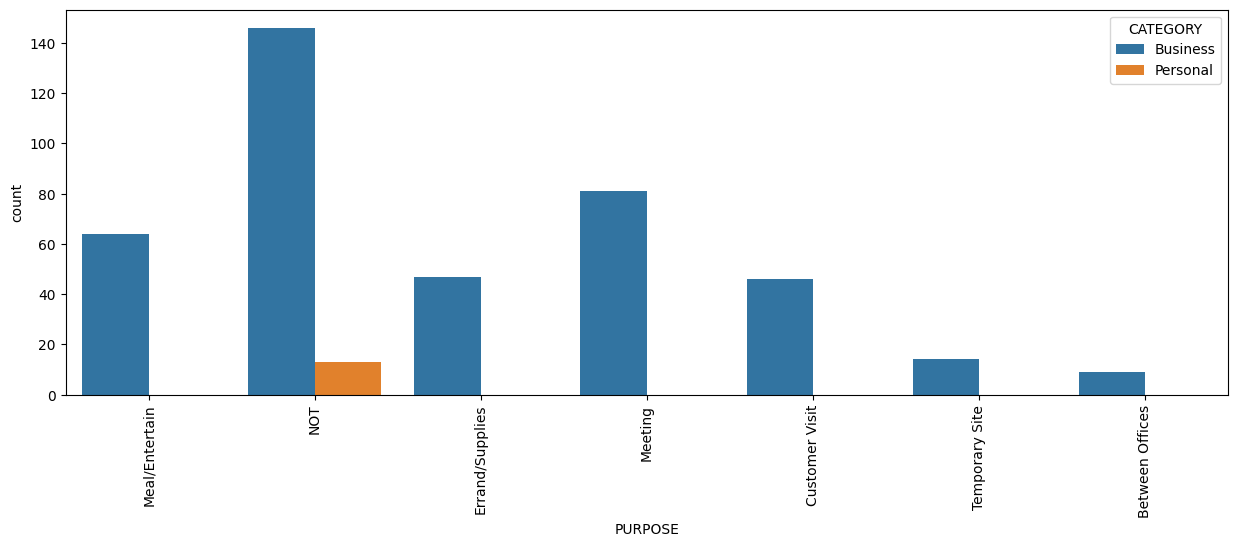

In [34]:
# Comparing the Two Different Categories within the Purpose

plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

 Exploring Miles Column

<Axes: ylabel='MILES'>

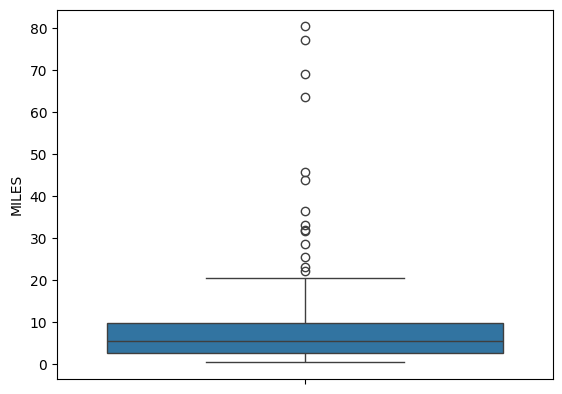

In [35]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

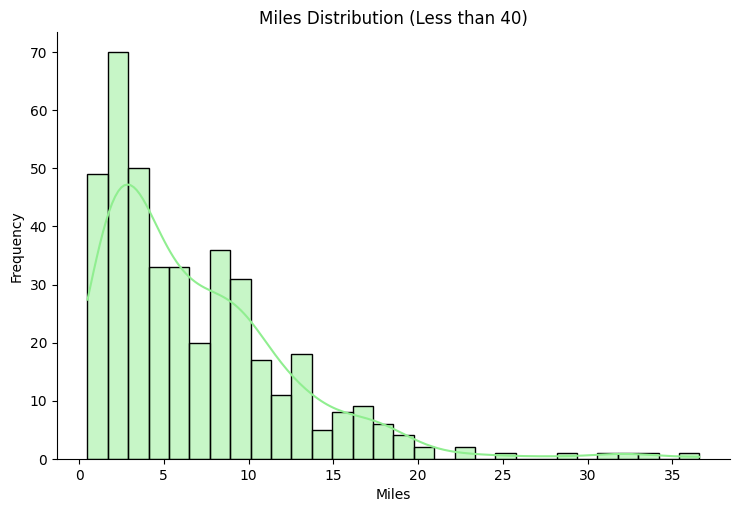

In [36]:
# we can use Displot() values less than 40

sns.displot(dataset[dataset['MILES']<40]['MILES'], kde=True, color="lightgreen", bins=30, height=5, aspect=1.5)
plt.title("Miles Distribution (Less than 40)")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()



Time-Series Analysis (Month-Year Trends)

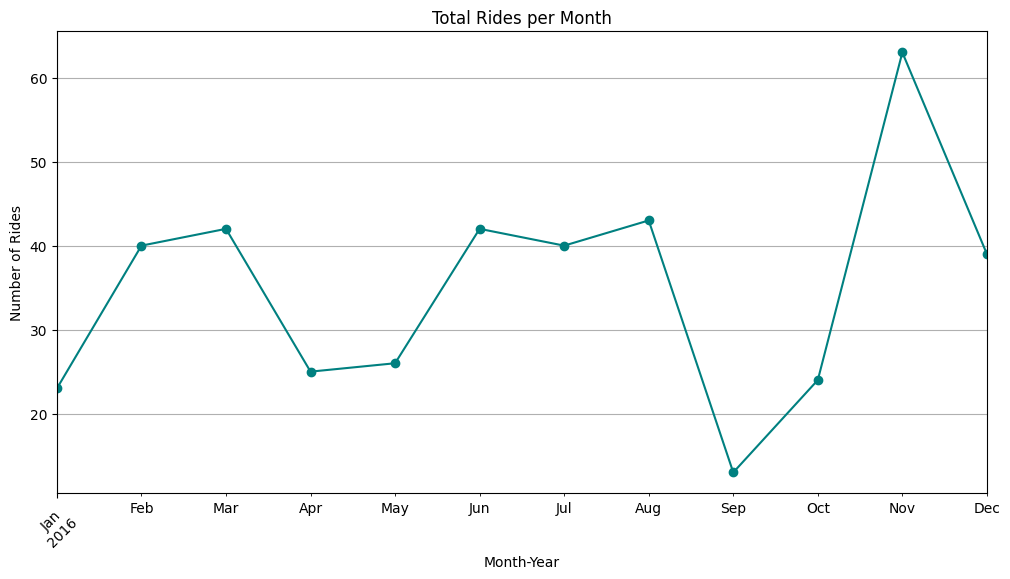

In [37]:
# Extract month-year
dataset['Month_Year'] = dataset['START_DATE'].dt.to_period('M')

# Count rides per month
rides_per_month = dataset['Month_Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
rides_per_month.plot(kind='line', marker='o', color='teal')
plt.title("Total Rides per Month")
plt.xlabel("Month-Year")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
